In [1]:
import numpy as np
import xarray as xr
import os.path as op
from dask.diagnostics import ProgressBar
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
import matplotlib.colors as clrs
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pdir = '/swot/SUM05/takaya/MITgcm/channel/runs/'
bdir = '/swot/SUM02/takaya/channelMOC-Darwin/'

In [9]:
ys20, dy20 = (58,4)
ys10, dy10 = (272,10)
ys5, dy5 = (31,5)
dt = 12e2
df = 72
ts = int(360*86400*ys20/8e2 + 15e0*360*86400/dt)
te = int(ts + 360*86400*dy20/dt)
print(ts,te)
ds = open_mdsdataset(op.join(bdir,'20km_mp10-15_mu092-067_Kp01-0175_Ki59-105_Kn015-035_g2-7_mz40_rFe1'), 
                    grid_dir=op.join(pdir,'20km_grid'),
                    iters=range(ts+df,te+df,df),
                    prefix=['FeTtave'], delta_t=dt
                    )
ds

2643840 2747520


/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 50, XG: 50, YC: 100, YG: 100, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1440)
Coordinates:
  * XC        (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC        (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * XG        (XG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * YG        (YG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA        (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dxG       (YG, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dyG       (YC, XG) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth     (YC

In [10]:
ds.ADVyTr03.attrs

OrderedDict([('standard_name', 'ADVyTr03'),
             ('long_name', 'Meridional Advective Flux of FeT'),
             ('units', 'mM/m^3 .m^3/s'),
             ('mate', 'ADVxTr03')])

In [11]:
grid = Grid(ds, periodic=['X'])

# Monthly budget

In [12]:
month = np.tile(np.repeat(range(12),30),dy20)
ds['month'] = ('time', month)
ds_mon = ds.groupby('month').mean(['time','XC','XG'])
ds_anom = ds.groupby('month') - ds_mon
# with ProgressBar():
#     ds_mon.load()
#     ds_anom.load()

In [13]:
with ProgressBar():
    Feb = ds_mon.TRAC03.load()
    vFeb = ds_mon.VTRAC03.load()
    wFeb = ds_mon.WTRAC03.load()
    advVb = ds_mon.ADVyTr03.load()
    advWb = ds_mon.ADVrTr03.load()
    kppb = ds_mon.KPPgTr03.load()
    dfib = ds_mon.DFrITr03.load()
    bgcb = ds_mon.FeTbgc.load()

[########################################] | 100% Completed |  5.6s
[########################################] | 100% Completed |  5.6s
[########################################] | 100% Completed |  6.0s
[########################################] | 100% Completed |  5.5s
[########################################] | 100% Completed |  6.0s
[########################################] | 100% Completed |  5.5s
[########################################] | 100% Completed |  5.7s
[########################################] | 100% Completed |  4.9s


In [39]:
wFeb

<xarray.DataArray 'WTRAC03' (month: 12, Z: 40, YC: 200)>
array([[[ 0.000000e+00,  2.594973e-14, ..., -1.504165e-12, -1.717521e-12],
        [ 0.000000e+00,  1.259378e-12, ..., -2.111834e-12,  5.439021e-12],
        ...,
        [ 0.000000e+00,  6.985664e-14, ...,  9.171935e-11,  7.143396e-11],
        [ 0.000000e+00, -6.259144e-14, ...,  9.735888e-11,  7.806795e-11]],

       [[ 0.000000e+00, -2.733816e-14, ...,  1.751070e-12,  1.954635e-12],
        [ 0.000000e+00,  1.238136e-12, ...,  1.754489e-12,  9.345190e-12],
        ...,
        [ 0.000000e+00,  1.162389e-13, ...,  1.097960e-10,  5.073604e-11],
        [ 0.000000e+00, -7.046014e-15, ...,  1.209332e-10,  5.351489e-11]],

       ...,

       [[ 0.000000e+00,  4.383020e-14, ..., -1.945778e-12, -2.289115e-12],
        [ 0.000000e+00,  4.003904e-12, ..., -6.642670e-13,  9.872261e-12],
        ...,
        [ 0.000000e+00, -1.641033e-13, ...,  8.349320e-11,  2.609898e-11],
        [ 0.000000e+00, -2.321805e-13, ...,  9.823649e-11,  2.

In [14]:
advzb = grid.diff(advWb, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC')
advyb = grid.diff(advVb, 'Y', boundary='fill')/(ds.rA*ds.drF).mean('XC')
advb = -(-advzb + advyb).compute()

difz = grid.diff(dfib, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC').compute()
kpp = grid.diff(kppb, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC').compute()

advb

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
array([[[-0.000000e+00,  3.295692e-13, ...,  9.641035e-13, -1.671049e-12],
        [-0.000000e+00,  3.138368e-13, ..., -2.537411e-13, -2.467148e-12],
        ...,
        [-0.000000e+00,  3.133140e-14, ..., -4.995594e-13, -7.639406e-14],
        [-0.000000e+00,  2.479507e-14, ..., -3.118696e-13, -2.450622e-15]],

       [[-0.000000e+00,  3.017420e-13, ...,  2.087827e-13, -1.270165e-12],
        [-0.000000e+00,  2.866148e-13, ..., -3.492009e-13, -1.910711e-12],
        ...,
        [-0.000000e+00,  1.269302e-13, ..., -5.765067e-13, -1.155097e-13],
        [-0.000000e+00,  1.226099e-13, ..., -3.766320e-13, -4.945393e-14]],

       ...,

       [[-0.000000e+00,  4.855143e-13, ..., -3.860851e-12, -6.602088e-12],
        [-0.000000e+00,  4.656544e-13, ...,  1.127031e-12, -5.781931e-12],
        ...,
        [-0.000000e+00,  8.317474e-14, ..., -7.602760e-13, -7.853209e-14],
        [-0.000000e+00,  7.802996e-14, ..., -5.889806e-13, -2.699707e-14

In [15]:
ss = bgcb
ss

<xarray.DataArray 'FeTbgc' (month: 12, Z: 40, YC: 100)>
array([[[ 0.000000e+00, -3.111557e-14, ..., -2.790480e-11, -3.065923e-11],
        [ 0.000000e+00, -1.041947e-13, ..., -2.614695e-11, -2.931462e-11],
        ...,
        [ 0.000000e+00,  2.119133e-15, ...,  2.191820e-14,  2.752984e-14],
        [ 0.000000e+00,  3.153918e-14, ...,  4.231629e-13,  5.053150e-13]],

       [[ 0.000000e+00, -2.861750e-14, ..., -2.544913e-11, -2.955896e-11],
        [ 0.000000e+00, -8.766841e-14, ..., -2.528182e-11, -2.899731e-11],
        ...,
        [ 0.000000e+00,  1.373779e-15, ...,  1.979752e-14,  2.487933e-14],
        [ 0.000000e+00,  2.642264e-14, ...,  4.006582e-13,  4.805841e-13]],

       ...,

       [[ 0.000000e+00, -4.633672e-14, ..., -1.180724e-11, -1.120809e-11],
        [ 0.000000e+00, -9.436892e-14, ..., -2.353839e-11, -1.824578e-11],
        ...,
        [ 0.000000e+00,  3.543791e-15, ...,  3.025570e-14,  3.580176e-14],
        [ 0.000000e+00,  3.790346e-14, ...,  4.515816e-13,  5.2

In [17]:
dsS = open_mdsdataset(op.join(bdir,'20km_mp10-15_mu092-067_Kp01-0175_Ki59-105_Kn015-035_g2-7_mz40_rFe1'), 
                      grid_dir=op.join(pdir,'20km_grid'),
                      iters=range(ts,te,2160),
                      prefix=['FeTsnap_30d'], 
                      delta_t=dt
                     )
dsS

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 50, XG: 50, YC: 100, YG: 100, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 48)
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * XG       (XG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * YG       (YG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dxG      (YG, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dyG      (YC, XG) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth    (YC, XC) >f4 dask.

In [1]:
fe_xbar = dsS.TRAC03.mean('XC')
print(dsS.TRAC03.attrs)
tempo = (-fe_xbar+fe_xbar.roll(time=-1).data) / (3e1*864e2)
# tempo = fe_xbar.diff('time') / (3e1*864e2)
tempo.coords['month'] = ('time',np.tile(range(12),dy20))

# febar_vol = grid.cumsum(febar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC'])*ds.drF,
#                         'Z', to='outer', boundary='fill'
#                        )[:,:,nys:nyn].sum(['YC'])
# dfebardt = (-febar_vol + febar_vol.roll(month=-1).data).compute() / (3e1*24.*36e2)

dFe = tempo.groupby('month').mean(['time']).compute()
dFe.attrs['unit'] = 'mmol Fe m-3 s-1'

dFe

NameError: name 'dsS' is not defined

In [20]:
res = (dFe - (advb + difz + kpp + ss)).compute()
res

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
array([[[ 0.000000e+00, -4.581372e-13, ...,  2.448180e-11,  3.004883e-11],
        [ 0.000000e+00, -4.554785e-13, ...,  2.411853e-11,  2.841371e-11],
        ...,
        [ 0.000000e+00, -6.082275e-14, ...,  8.564542e-13,  5.242998e-13],
        [ 0.000000e+00, -8.557266e-14, ...,  2.684068e-13, -5.379014e-14]],

       [[ 0.000000e+00, -4.505920e-13, ...,  2.470339e-11,  3.039585e-11],
        [ 0.000000e+00, -4.548498e-13, ...,  2.475521e-11,  2.993078e-11],
        ...,
        [ 0.000000e+00, -6.904254e-14, ...,  6.749266e-13,  2.732255e-13],
        [ 0.000000e+00, -9.173525e-14, ...,  8.836654e-14, -2.848419e-13]],

       ...,

       [[ 0.000000e+00, -5.755882e-13, ...,  1.419501e-11,  9.959894e-12],
        [ 0.000000e+00, -5.709652e-13, ...,  2.650305e-11,  2.651414e-11],
        ...,
        [ 0.000000e+00, -1.727700e-13, ...,  4.157225e-13, -6.153032e-14],
        [ 0.000000e+00, -1.911439e-13, ..., -1.151654e-13, -5.773888e-13

In [21]:
nys,nyn = (600,1400)
adv_mean = advb.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
advz_mean = advzb.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
advy_mean = advyb.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dif_mean = difz.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
kpp_mean = kpp.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dot_mean = ss.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dFe_mean = dFe.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
res_mean = res.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()

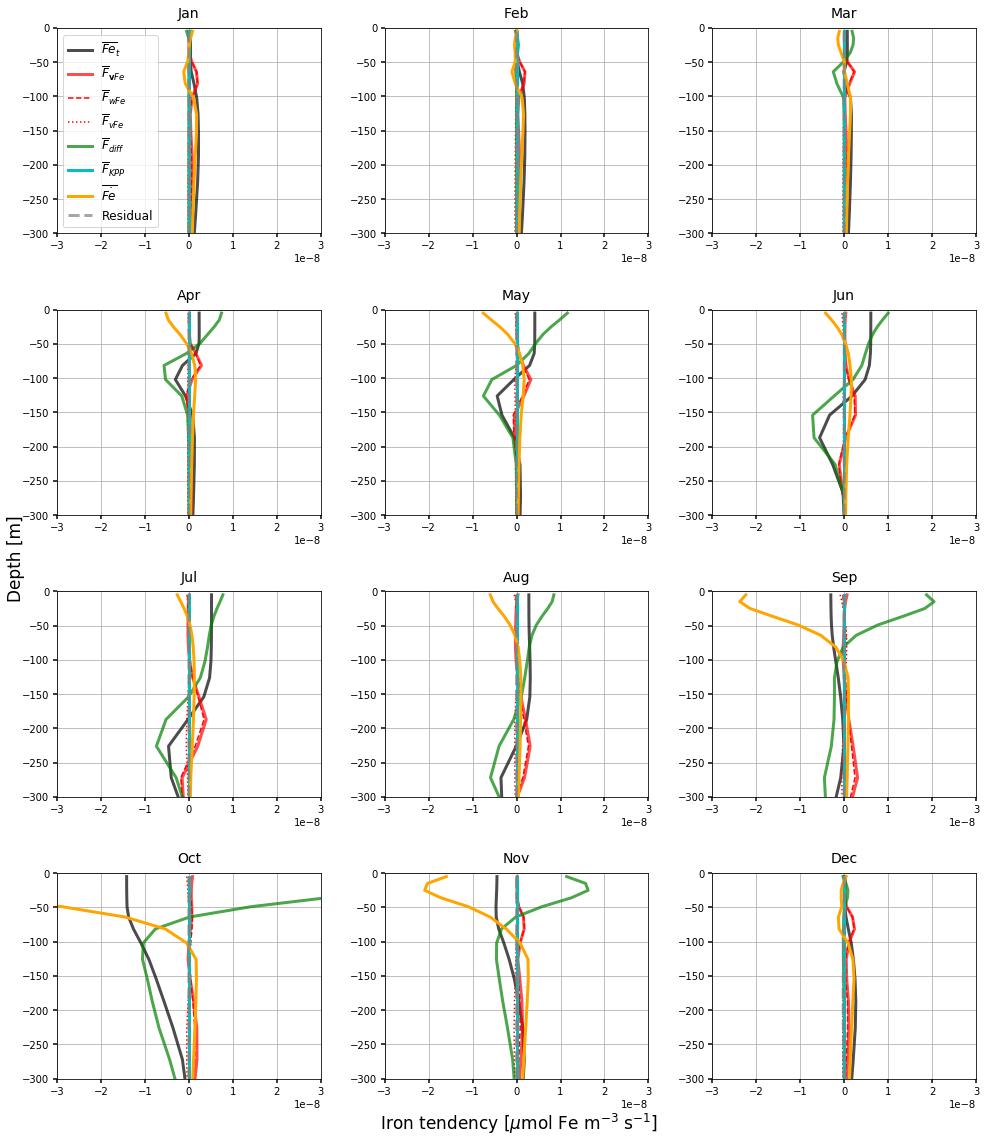

In [22]:
colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(14,16))
for j in range(4):
    for i in range(3):
        axes[j,i].plot(dFe_mean[j*3+i]*1e3, dFe_mean.Z, 'k',
                       lw=3, alpha=0.7, label=r'$\overline{Fe}_t$')
        axes[j,i].plot(adv_mean[j*3+i]*1e3, adv_mean.Z, 'r',
                       lw=3, alpha=0.7, label=r'$\overline{F}_{\mathbf{v} Fe}$')
        axes[j,i].plot(advz_mean[j*3+i]*1e3, adv_mean.Z, 'r',
                       ls='--', label=r'$\overline{F}_{w Fe}$')
        axes[j,i].plot(advy_mean[j*3+i]*1e3, adv_mean.Z, 'r',
                       ls=':', label=r'$\overline{F}_{v Fe}$')
        axes[j,i].plot(dif_mean[j*3+i]*1e3, dif_mean.Z, 'g',
                       lw=3, alpha=0.7, label=r"$\overline{F}_{diff}$")
        axes[j,i].plot(kpp_mean[j*3+i]*1e3, kpp_mean.Z, 'c',
                       lw=3, label=r"$\overline{F}_{KPP}$")
        axes[j,i].plot(dot_mean[j*3+i]*1e3, dot_mean.Z, 'orange',
                       lw=3, label=r"$\overline{\dot{Fe}}$")
        axes[j,i].plot(res_mean[j*3+i]*1e3, res_mean.Z, '--', color='grey',
                       lw=3, alpha=0.7, label=r"Residual")
#         ax2 = axes[j,i].twiny()
#         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
#                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
#                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
#                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
#                       )
# #         ax2.set_xlim([.1,1e1])
#         ax2.set_xscale('log')
#         ax2.xaxis.label.set_color(p2.get_color())

        tkw = dict(size=4, width=1.5)
#         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)
        axes[j,i].tick_params(axis='both', **tkw)
        
        axes[j,i].set_title(months[j*3+i],fontsize=14,y=1.02)
        axes[0,0].legend(loc='lower left', fontsize=12)
        axes[j,i].set_xlim([-3e-8,3e-8])
        axes[j,i].set_ylim([-3e2,0.])
        axes[j,i].grid(True)

fig.subplots_adjust(left=0.1)
# cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# cbar = fig.colorbar(cax, cax=cbar_ax)
# cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

fig.text(0.01, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=17)
fig.text(0.38, 0.009, 'Iron tendency [$\mu$mol Fe m$^{-3}$ s$^{-1}$]', 
         va='center', rotation='horizontal', fontsize=17)

plt.tight_layout(pad=2.5)
# plt.grid(True)
# plt.savefig(op.join(ddir,'IronFlux_monthlyclim-at-eachdepth_20km.pdf'))

# Eddy-mean decomposition

In [23]:
dsvw = open_mdsdataset(op.join(pdir, 'Phys-only_20km'), grid_dir=op.join(pdir, '20km_grid'),
                      iters=range(ts+df,te+df,df),
                      prefix=['MOMtave'], delta_t=dt
                      )

/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/Phys-only_20km. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


In [24]:
month = np.tile(np.repeat(range(12),30),dy20)
dsvw['month'] = ('time', month)
dsvw_mon = dsvw.groupby('month').mean(['time','XC','XG'])
dsvw_anom = dsvw.groupby('month') - dsvw_mon
# with ProgressBar():
#     dsvw_mon.load()
#     dsvw_anom.load()

In [25]:
with ProgressBar():
    febar = ds_mon.TRAC03.load()
    vbar = dsvw_mon.VVEL.load()
    wbar = dsvw_mon.WVEL.load()
fe_intrp = grid.interp(febar, 'Y', boundary='fill')
vbfeb = (vbar * fe_intrp).compute()
fe_intrp = grid.interp(febar, 'Z', boundary='fill')
wbfeb = (wbar * fe_intrp).compute()

print(vbfeb, wbfeb)

[########################################] | 100% Completed |  5.3s
[########################################] | 100% Completed |  5.4s
<xarray.DataArray (month: 12, Z: 40, YG: 100)>
array([[[ 0.000000e+00,  0.000000e+00, ..., -3.243100e-10, -2.086819e-09],
        [ 0.000000e+00,  0.000000e+00, ..., -7.860162e-11,  1.197165e-09],
        ...,
        [ 0.000000e+00,  0.000000e+00, ...,  5.438492e-10, -2.414719e-09],
        [ 0.000000e+00,  0.000000e+00, ...,  2.595293e-08,  2.517777e-08]],

       [[ 0.000000e+00,  0.000000e+00, ..., -3.988407e-10, -9.916304e-10],
        [ 0.000000e+00,  0.000000e+00, ...,  9.394830e-10,  4.497167e-10],
        ...,
        [ 0.000000e+00,  0.000000e+00, ...,  9.329660e-10, -2.400449e-09],
        [ 0.000000e+00,  0.000000e+00, ...,  2.776289e-08,  2.623960e-08]],

       ...,

       [[ 0.000000e+00,  0.000000e+00, ..., -6.767908e-09, -1.203542e-08],
        [ 0.000000e+00,  0.000000e+00, ..., -3.040966e-10,  4.251723e-09],
        ...,
        [ 0

In [26]:
dwfe = advWb/ds.rA.mean('XC') - grid.interp(wFeb,'Z',boundary='fill')
dvfe = advVb/(ds.drF*ds.dxG).mean('XC') - vFeb

dwfe_bar = grid.diff(dwfe,'Z',boundary='fill') * ds.drF**-1
dvfe_bar = grid.diff(dvfe*ds.dxG.mean('XC'),
                    'Y',boundary='fill') * ds.rA.mean(['XC'])**-1
print(dwfe_bar, dvfe_bar)
dadv = -(-dwfe_bar + dvfe_bar)
dadv

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 39, 100)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    drF      (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    PHrefC   (Z) >f4 dask.array<shape=(40,), chunksize=(40,)> <xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 40, 99)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...


<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 39, 99)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    drF      (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    PHrefC   (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>

In [27]:
advbarfebar = grid.diff(vbfeb*ds.dxG.mean('XC'),
                        'Y',boundary='fill') * ds.rA.mean(['XC'])**-1
adwbarfebar = grid.diff(wbfeb,'Z',boundary='fill') * ds.drF**-1

print(advbarfebar, adwbarfebar)

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 40, 99)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ... <xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 40, 100)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    drF      (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    PHrefC   (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>


In [28]:
vpfep_bar = vFeb - vbfeb
advpfep_bar = grid.diff(vpfep_bar*ds.dxG.mean('XC'),'Y',
                        boundary='fill') * ds.rA.mean('XC')**-1
wpfep_bar = grid.interp(wFeb,'Z',boundary='fill') - wbfeb
adwpfep_bar = grid.diff(wpfep_bar,'Z',boundary='fill') * ds.drF**-1

print(advpfep_bar, adwpfep_bar)

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 40, 99)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ... <xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 40, 100)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    drF      (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    PHrefC   (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>


In [29]:
advbb = -(-adwbarfebar + advbarfebar)
advpp_b = -(-adwpfep_bar + advpfep_bar)

In [30]:
res = dFe - ((advbb+advpp_b) + difz + kpp + ss + dadv)
res

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 39, 99)>
Coordinates:
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11

In [31]:
nys,nyn = (600,1400)
with ProgressBar():
    advbb_mean = advbb.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_mean = advpp_b.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_meanz = adwpfep_bar.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_meany = -advpfep_bar.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dadv_mean = dadv.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dFe_mean = dFe.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dif_mean = difz.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    kpp_mean = kpp.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dot_mean = ss.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    res_mean = res.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


In [105]:
dFe_mean

<xarray.DataArray (month: 12, Z: 40)>
array([[ 6.602623e-13,  6.606361e-13,  6.592773e-13, ..., -3.081533e-14,
        -2.507003e-14,  1.569572e-14],
       [ 2.271325e-12,  2.276973e-12,  2.282948e-12, ..., -5.724072e-14,
        -5.412607e-14, -2.597354e-14],
       [ 5.557692e-12,  5.561860e-12,  5.563838e-12, ..., -3.585431e-14,
        -3.317775e-14, -6.416296e-14],
       ...,
       [-2.515271e-12, -2.504610e-12, -2.486697e-12, ...,  3.042123e-15,
         1.637267e-14, -7.214707e-15],
       [-2.664110e-11, -2.659383e-11, -2.650453e-11, ..., -2.055638e-14,
        -1.288906e-14, -1.651788e-14],
       [-2.440117e-12, -2.495083e-12, -2.592907e-12, ...,  4.832168e-13,
         4.945380e-13,  5.216723e-13]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
  * month    (m

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


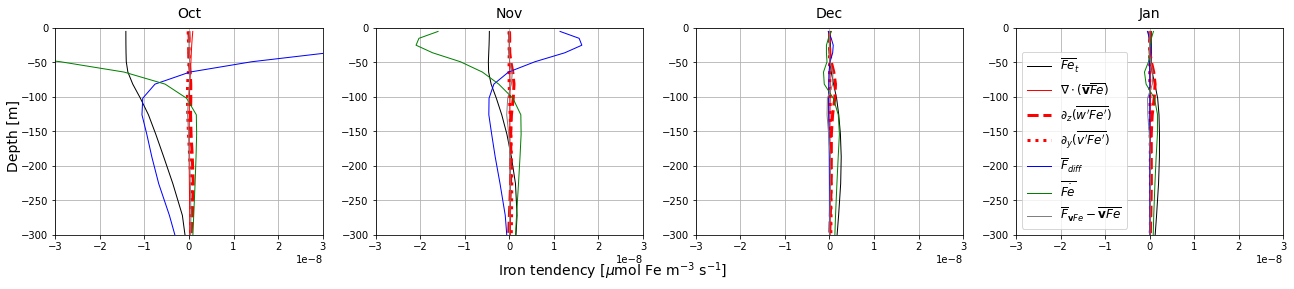

In [34]:
colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

tkw = dict(size=4, width=1.5)
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(18,4))
for i in range(4):
    if i < 3:
        nn = 9+i
        axes[i].plot(dFe_mean[nn]*1e3, dFe_mean.Z, 'k',
                    lw=1, label=r'$\overline{Fe}_t$')
        axes[i].plot(advbb_mean[nn]*1e3, advbb_mean.Z, 'r',
                    lw=1, label=r'$\nabla\cdot (\overline{\mathbf{v}} \overline{Fe})$')
        axes[i].plot(advpp_meanz[nn]*1e3, advpp_mean.Z, 'r--',
                    lw=3, label=r"$\partial_z (\overline{w' Fe'})$")
        axes[i].plot(advpp_meany[nn]*1e3, advpp_mean.Z, 'r:',
                    lw=3, label=r"$\partial_y (\overline{v' Fe'})$")
        axes[i].plot((dif_mean+kpp_mean)[nn]*1e3, dif_mean.Z, 'b',
                    lw=1, label=r"$\overline{F}_{diff}$")
#             axes[1,i].plot(kpp_mean[nn]*1e3, kpp_mean.Z, 'c',
#                            lw=1, label=r"$\overline{F}_{KPP}$")
        axes[i].plot(dot_mean[nn]*1e3, dot_mean.Z, 'g',
                    lw=1, label=r"$\overline{\dot{Fe}}$")
        axes[i].plot(dadv_mean[nn]*1e3, dadv_mean.Z, color='grey',
                    lw=1, label=r"$\overline{F}_{\mathbf{v}Fe} - \overline{\mathbf{v}Fe}$")
#             axes[1,i].plot(res_mean[nn]*1e3, res_mean.Z, '--', color='grey',
#                            lw=1, label=r"Residual")
        axes[i].tick_params(axis='both')
        axes[i].set_title(months[nn],fontsize=14,y=1.02)
        axes[i].set_xlim([-3e-8, 3e-8])
        axes[i].set_ylim([-3e2, 0])
        axes[i].grid(True)
    else:
        nn = 0
        axes[i].plot(dFe_mean[nn]*1e3, dFe_mean.Z, 'k',
                    lw=1, label=r'$\overline{Fe}_t$')
        axes[i].plot(advbb_mean[nn]*1e3, advbb_mean.Z, 'r',
                    lw=1, label=r'$\nabla\cdot (\overline{\mathbf{v}} \overline{Fe})$')
        axes[i].plot(advpp_meanz[nn]*1e3, advpp_mean.Z, 'r--',
                    lw=3, label=r"$\partial_z (\overline{w' Fe'})$")
        axes[i].plot(advpp_meany[nn]*1e3, advpp_mean.Z, 'r:',
                    lw=3, label=r"$\partial_y (\overline{v' Fe'})$")
        axes[i].plot((dif_mean+kpp_mean)[nn]*1e3, dif_mean.Z, 'b',
                    lw=1, label=r"$\overline{F}_{diff}$")
#             axes[1,i].plot(kpp_mean[nn]*1e3, kpp_mean.Z, 'c',
#                            lw=1, label=r"$\overline{F}_{KPP}$")
        axes[i].plot(dot_mean[nn]*1e3, dot_mean.Z, 'g',
                    lw=1, label=r"$\overline{\dot{Fe}}$")
        axes[i].plot(dadv_mean[nn]*1e3, dadv_mean.Z, color='grey',
                    lw=1, label=r"$\overline{F}_{\mathbf{v}Fe} - \overline{\mathbf{v}Fe}$")
#             axes[1,i].plot(res_mean[nn]*1e3, res_mean.Z, '--', color='grey',
#                            lw=1, label=r"Residual")
        axes[i].tick_params(axis='both')
        axes[i].set_title(months[nn],fontsize=14,y=1.02)
        axes[i].set_xlim([-3e-8, 3e-8])
        axes[i].set_ylim([-3e2, 0])
        axes[i].grid(True)
        
    axes[3].legend(loc='lower left', fontsize=12)
# for j in range(4):
#     for i in range(3):
#         nn = j*3+i
#         if j==0:
#             axes[1,i].plot(dFe_mean[nn]*1e3, dFe_mean.Z, 'k',
#                            lw=1, label=r'$\overline{Fe}_t$')
#             axes[1,i].plot(advbb_mean[nn]*1e3, advbb_mean.Z, 'r',
#                            lw=1, label=r'$\nabla\cdot (\overline{\mathbf{v}} \overline{Fe})$')
#             axes[1,i].plot(advpp_meanz[nn]*1e3, advpp_mean.Z, 'r--',
#                            lw=3, label=r"$\partial_z (\overline{w' Fe'})$")
#             axes[1,i].plot(advpp_meany[nn]*1e3, advpp_mean.Z, 'r:',
#                            lw=3, label=r"$\partial_y (\overline{v' Fe'})$")
#             axes[1,i].plot((dif_mean+kpp_mean)[nn]*1e3, dif_mean.Z, 'b',
#                            lw=1, label=r"$\overline{F}_{diff}$")
# #             axes[1,i].plot(kpp_mean[nn]*1e3, kpp_mean.Z, 'c',
# #                            lw=1, label=r"$\overline{F}_{KPP}$")
#             axes[1,i].plot(dot_mean[nn]*1e3, dot_mean.Z, 'g',
#                            lw=1, label=r"$\overline{\dot{Fe}}$")
#             axes[1,i].plot(dadv_mean[nn]*1e3, dadv_mean.Z, color='grey',
#                            lw=1, label=r"$\overline{F}_{\mathbf{v}Fe} - \overline{\mathbf{v}Fe}$")
# #             axes[1,i].plot(res_mean[nn]*1e3, res_mean.Z, '--', color='grey',
# #                            lw=1, label=r"Residual")
#             axes[1,i].tick_params(axis='both')
#             axes[1,i].set_title(months[nn],fontsize=14,y=1.02)
#             axes[1,i].set_xlim([-3e-8, 3e-8])
#             axes[1,i].set_ylim([-3e2, 0])
#             axes[1,i].grid(True)
#         elif j==3:
#             axes[0,i].plot(dFe_mean[nn]*1e3, dFe_mean.Z, 'k',
#                            lw=1, label=r'$\overline{Fe}_t$')
#             axes[0,i].plot(advbb_mean[nn]*1e3, advbb_mean.Z, 'r',
#                            lw=1, label=r'$\nabla\cdot (\overline{\mathbf{v}} \overline{Fe})$')
#             axes[0,i].plot(advpp_meanz[nn]*1e3, advpp_mean.Z, 'r--',
#                            lw=3, label=r"$\partial_z (\overline{w' Fe'})$")
#             axes[0,i].plot(advpp_meany[nn]*1e3, advpp_mean.Z, 'r:',
#                            lw=3, label=r"$\partial_y (\overline{v' Fe'})$")
#             axes[0,i].plot((dif_mean+kpp_mean)[nn]*1e3, dif_mean.Z, 'b',
#                            lw=1, label=r"$\overline{F}_{diff}$")
# #             axes[0,i].plot(kpp_mean[nn]*1e3, kpp_mean.Z, 'c',
# #                            lw=1, label=r"$\overline{F}_{KPP}$")
#             axes[0,i].plot(dot_mean[nn]*1e3, dot_mean.Z, 'g',
#                            lw=1, label=r"$\overline{\dot{Fe}}$")
#             axes[0,i].plot(dadv_mean[nn]*1e3, dadv_mean.Z, color='grey',
#                            lw=1, label=r"$\overline{F}_{\mathbf{v}Fe} - \overline{\mathbf{v}Fe}$")
# #             axes[0,i].plot(res_mean[nn]*1e3, res_mean.Z, '--', color='grey',
# #                            lw=1, label=r"Residual")
#             axes[0,i].tick_params(axis='both')
#             axes[0,i].set_title(months[nn],fontsize=14,y=1.02)
#             axes[0,i].set_xlim([-3e-8, 3e-8])
#             axes[0,i].set_ylim([-3e2, 0])
#             axes[0,i].grid(True)
# #         ax2 = axes[j,i].twiny()
# #         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
# #                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
# #                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
# #                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
# #                       )
# # #         ax2.set_xlim([.1,1e1])
# #         ax2.set_xscale('log')
# #         ax2.xaxis.label.set_color(p2.get_color())
#         axes[1,0].legend(loc='lower left', fontsize=12)
#         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# cbar = fig.colorbar(cax, cax=cbar_ax)
# cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

fig.text(0.001, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=14)
fig.text(0.38, 0.03, 'Iron tendency [$\mu$mol Fe m$^{-3}$ s$^{-1}$]', 
         va='center', rotation='horizontal', fontsize=14)

# fig.subplots_adjust(bottom=0.4)
plt.tight_layout(pad=1.5)
# plt.grid(True)
plt.savefig(op.join(ddir,'Figures/IronFlux_monthlyclim-at-eachdepth_withPPterms_20km.pdf'))

# Iron limitation

In [64]:
dtype = '>f8'
shape = (12,100,50)
par_north = 3e1+2e1*np.cos(np.pi/6*np.arange(1,13))
par_ideal = par_north[:,np.newaxis] + np.linspace(-10,0,num=100)[np.newaxis,:]
# PAR.shape = shape
PAR = xr.DataArray(par_ideal, dims=['month','YC'],
                  coords={'month':range(1,13),'YC':ds.YC.data}
                  )
PAR

<xarray.DataArray (month: 12, YC: 100)>
array([[37.320508, 37.421518, 37.522528, ..., 47.118488, 47.219498, 47.320508],
       [30.      , 30.10101 , 30.20202 , ..., 39.79798 , 39.89899 , 40.      ],
       [20.      , 20.10101 , 20.20202 , ..., 29.79798 , 29.89899 , 30.      ],
       ...,
       [30.      , 30.10101 , 30.20202 , ..., 39.79798 , 39.89899 , 40.      ],
       [37.320508, 37.421518, 37.522528, ..., 47.118488, 47.219498, 47.320508],
       [40.      , 40.10101 , 40.20202 , ..., 49.79798 , 49.89899 , 50.      ]])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...

In [65]:
kP_s = 0.008
kP_b = 0.024
kpar_s = 0.2*1e-1
kinh_s = 0.2*1e-3
kpar_b = 0.001*1e-1
kinh_b = 2.3*1e-3
I = PAR*1e6/86400
# Fo = KpS/(KpS+KiS)*np.exp(KiS/KpS*np.log(KiS/(KpS+KiS)))
# Fo_s = kpar_s*kinh_s/(kpar_s+kinh_s)**2 * np.exp(kinh_s/kpar_s)
Fo_s = kpar_s/(kpar_s+kinh_s)*np.exp(kinh_s/kpar_s
                                     * np.log(kinh_s/(kpar_s+kinh_s))
                                    )
gammaIs = Fo_s**-1 * (1.-np.exp(-kpar_s*I)) * np.exp(-kinh_s*I)
# Fo_b = kpar_b*kinh_b/(kpar_b+kinh_b)**2 * np.exp(kinh_b/kpar_b)
Fo_b = kpar_b/(kpar_b+kinh_b)*np.exp(kinh_b/kpar_b
                                     * np.log(kinh_b/(kpar_b+kinh_b))
                                    )
gammaIb = Fo_b**-1 * (1.-np.exp(-kpar_b*I)) * np.exp(-kinh_b*I)
facNO2 = 1.
facNH4 = .5
CkSi = 1.
r_SiP_dia = 32.
r_NP = 16.
r_FeP = .8e-3

kSi_b = kP_b * r_SiP_dia # This parameter is not used on our TWO_SPECIES set up
# kSi_b = CkSi
kN_b = kP_b * r_NP
kN_s = kP_b * r_NP
kFe_b = kP_b * r_FeP
kFe_s = kP_s * r_FeP

In [66]:
Ns_Fe = ds.TRAC03/(ds.TRAC03+kFe_s)
Nb_Fe = ds.TRAC03/(ds.TRAC03+kFe_b)
Ns_Fe.coords['days'] = ('time',np.tile(range(360),dy20))
Nb_Fe.coords['days'] = ('time',np.tile(range(360),dy20))
Nb_Fe

<xarray.DataArray 'TRAC03' (time: 1800, Z: 40, YC: 100, XC: 50)>
dask.array<shape=(1800, 40, 100, 50), dtype=float32, chunksize=(1, 40, 100, 50)>
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth    (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    drF      (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    PHrefC   (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(40, 100, 50), chunksize=(40, 100, 50)>
    iter     (time) int64 dask.array<shape=(1800,), chunksize=(1,)>
  * time     (time) float64 1.866e+09 1.866e+09 1.866e+09 1.867e+09 ...
    days     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [67]:
with ProgressBar():
    gamFes_mon = Ns_Fe.sel(Z=slice(0.,-100.)).groupby('days').mean(['time','Z','XC']).compute()
    gamFeb_mon = Nb_Fe.sel(Z=slice(0.,-100.)).groupby('days').mean(['time','Z','XC']).compute()
gamFes_mon

[########################################] | 100% Completed |  4.5s
[########################################] | 100% Completed |  4.6s


<xarray.DataArray 'TRAC03' (days: 360, YC: 100)>
array([[0.      , 0.052997, 0.111374, ..., 0.884364, 0.919859, 0.936879],
       [0.      , 0.05283 , 0.111208, ..., 0.884695, 0.920056, 0.936854],
       [0.      , 0.052836, 0.111183, ..., 0.885113, 0.920323, 0.936866],
       ...,
       [0.      , 0.075383, 0.141942, ..., 0.879727, 0.914104, 0.935042],
       [0.      , 0.075505, 0.142047, ..., 0.879646, 0.9139  , 0.934829],
       [0.      , 0.075588, 0.142166, ..., 0.879621, 0.913732, 0.934641]],
      dtype=float32)
Coordinates:
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [29]:
gammaIb

<xarray.DataArray (month: 12, YC: 400)>
array([[0.99989 , 0.999879, 0.999869, ..., 0.966233, 0.966087, 0.96594 ],
       [0.980814, 0.980965, 0.981114, ..., 0.996473, 0.996419, 0.996365],
       [0.858237, 0.858727, 0.859216, ..., 0.980511, 0.980663, 0.980814],
       ...,
       [0.980814, 0.980965, 0.981114, ..., 0.996473, 0.996419, 0.996365],
       [0.99989 , 0.999879, 0.999869, ..., 0.966233, 0.966087, 0.96594 ],
       [0.996365, 0.99631 , 0.996254, ..., 0.949254, 0.949083, 0.948912]])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


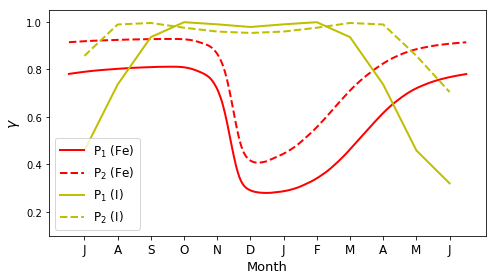

In [68]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']

fig, ax = plt.subplots(figsize=(7,4))
fig.set_tight_layout(True)
# ax2 = ax1.twinx()
# ax4 = ax3.twinx()
# dny = 50
# i = 0
# for y in range(300,100,-dny):
#     ax1.plot(gamFeb_mon.isel(YC=slice(y-dny,y)).mean(['YC']), lw=2, color=colors[i])
#     ax2.plot(gamFes_mon.isel(YC=slice(y-dny,y)).mean(['YC']), lw=2, color=colors[i],
#             label=r'$\gamma^{Fe}$ %03d-%03dkm' % ((y-dny)*5e0,y*5e0))
#     ax1.plot(gammaIb.isel(YC=slice(y-dny,y)).mean(['YC']), ls='--', lw=2, color=colors[i])
#     ax2.plot(gammaIs.isel(YC=slice(y-dny,y)).mean(['YC']), ls='--', lw=2, color=colors[i],
#             label=r'$\gamma^{I}$ %03d-%03dkm' % ((y-dny)*5e0,y*5e0))
#     i += 1
ax.plot(range(1,361), gamFeb_mon.sel(YC=slice(nys*1e3,nyn*1e3)).mean(['YC']).roll(days=-180), 'r', lw=2, 
        label=r'P$_1$ (Fe)')
ax.plot(range(1,361), gamFes_mon.sel(YC=slice(nys*1e3,nyn*1e3)).mean(['YC']).roll(days=-180), 'r--', lw=2,
        label=r'P$_2$ (Fe)')
ax.plot(np.linspace(15,345,12), gammaIb.sel(YC=slice(nys*1e3,nyn*1e3)).mean(['YC']).roll(month=-6), 'y', lw=2,
        label=r'P$_1$ (I)')
ax.plot(np.linspace(15,345,12), gammaIs.sel(YC=slice(nys*1e3,nyn*1e3)).mean(['YC']).roll(month=-6), 'y--', lw=2,
        label=r'P$_2$ (I)')

ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.asarray(month),-6), fontsize=12)

# ax.set_xlim([0,Ndays-1])
ax.set_ylim([.1,1.05])
# ax2.set_ylim([.1,1.05])
# ax1.set_xlim([0.,13])
# ax2.set_xlim([0.,13])
ax.set_xlabel(r"Month", fontsize=13)
# ax2.set_xlabel(r"Month", fontsize=13)
# ax.set_xlabel(r'Month', fontsize=13)
# ax2.set_ylabel(r'[mg Chl m$^{-3}$]', fontsize=13)
ax.set_ylabel(r'$\gamma$', fontsize=14)
fig.subplots_adjust(right=0.8)
# ax.set_title(r'P$_1$', fontsize=15)
# ax2.set_title(r'P$_2$', fontsize=15)
ax.legend(loc='lower left', 
#            bbox_to_anchor=(1., 0.), 
           fontsize=12)
plt.savefig(op.join(ddir,'Figures/Gamma_Fe-and-PAR_20km.pdf'))

# How is the influence of meridional flux at 500km

In [148]:
dot_500 = ss.sel(YC=5e5,method='nearest').compute()
dFe_500 = dFe.sel(YC=5e5,method='nearest').compute()
dif_500 = difz.sel(YC=5e5,method='nearest').compute()
kpp_500 = kpp.sel(YC=5e5,method='nearest').compute()
advbb_500z = adwbarfebar.sel(YC=5e5,method='nearest').compute()
advbb_500y = -advbarfebar.sel(YC=5e5,method='nearest').compute()
# advpp_500 = advpp_b[:,:,nys].compute()
advpp_500z = adwpfep_bar.sel(YC=5e5,method='nearest').compute()
advpp_500y = -advpfep_bar.sel(YC=5e5,method='nearest').compute()
dadv_500 = dadv.sel(YC=5e5,method='nearest').compute()
res_500 = res.sel(YC=5e5,method='nearest').compute()
res_500

<xarray.DataArray (month: 12, Z: 76)>
array([[-4.929824e-13, -9.757820e-18,  2.428613e-17, ..., -2.168404e-19,
        -7.264155e-18,  7.984412e-14],
       [ 4.415188e-13, -1.864828e-17,  1.257675e-17, ...,  7.209944e-18,
         4.445229e-18, -7.640389e-14],
       [ 1.268394e-12, -2.602085e-17,  7.372575e-18, ..., -1.398621e-17,
        -2.602085e-18, -1.332123e-13],
       ...,
       [ 1.473224e-12, -2.341877e-17,  2.341877e-17, ..., -1.270549e-17,
        -8.631266e-18, -1.474316e-14],
       [-6.516038e-13, -9.020562e-17,  8.326673e-17, ..., -1.870249e-18,
        -8.931115e-18, -5.355413e-14],
       [-6.578257e-13, -2.450297e-17,  5.572799e-17, ..., -2.141299e-18,
         1.230569e-17, -5.418323e-14]], dtype=float32)
Coordinates:
    YC       >f4 502500.0
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 1.93 2.2 2.5 2.84 3.21 3.63 4.1 ...
    PHrefC   (Z) >f4 4.905 15.4017 27.3699 41.05485 56.7018 74.50695 

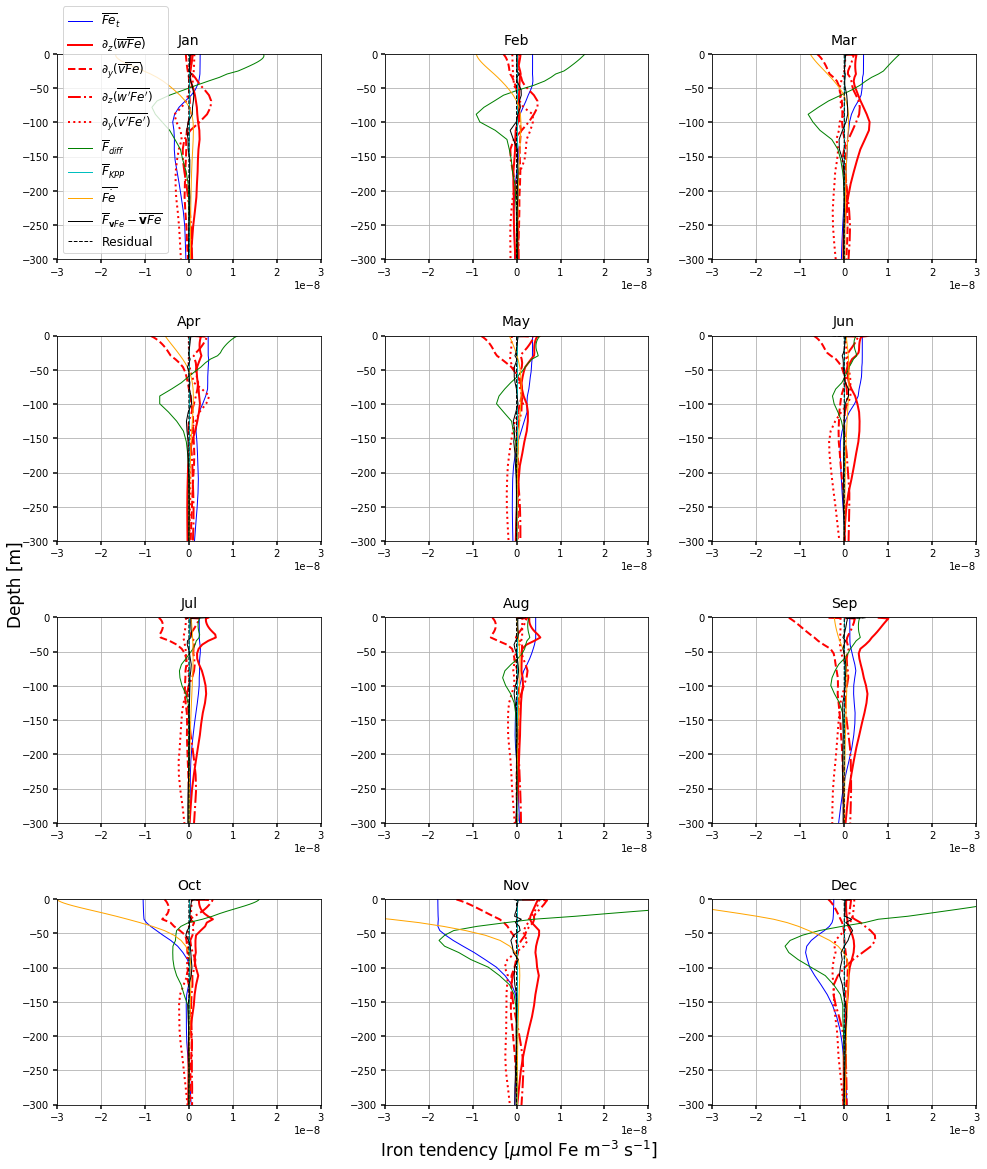

In [151]:
colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(14,16))
for j in range(4):
    for i in range(3):
        axes[j,i].plot(dFe_500[j*3+i]*1e3, dFe_mean.Z, 'b',
                       lw=1, label=r'$\overline{Fe}_t$')
        axes[j,i].plot(advbb_500z[j*3+i]*1e3, advbb_mean.Z, 'r',
                       lw=2, label=r'$\partial_z (\overline{w} \overline{Fe})$')
        axes[j,i].plot(advbb_500y[j*3+i]*1e3, advbb_mean.Z, 'r--',
                       lw=2, label=r'$\partial_y (\overline{v} \overline{Fe})$')
        axes[j,i].plot(advpp_500z[j*3+i]*1e3, advpp_mean.Z, 'r-.',
                       lw=2, label=r"$\partial_z (\overline{w' Fe'})$")
        axes[j,i].plot(advpp_500y[j*3+i]*1e3, advpp_mean.Z, 'r:',
                       lw=2, label=r"$\partial_y (\overline{v' Fe'})$")
        axes[j,i].plot(dif_500[j*3+i]*1e3, dif_mean.Z, 'g',
                       lw=1, label=r"$\overline{F}_{diff}$")
        axes[j,i].plot(kpp_500[j*3+i]*1e3, kpp_mean.Z, 'c',
                       lw=1, label=r"$\overline{F}_{KPP}$")
        axes[j,i].plot(dot_500[j*3+i]*1e3, dot_mean.Z, 'orange',
                       lw=1, label=r"$\overline{\dot{Fe}}$")
        axes[j,i].plot(dadv_500[j*3+i]*1e3, dadv_mean.Z, color='k',
                       lw=1, label=r"$\overline{F}_{\mathbf{v}Fe} - \overline{\mathbf{v}Fe}$")
        axes[j,i].plot(res_500[j*3+i]*1e3, res_mean.Z, '--', color='k',
                       lw=1, label=r"Residual")
#         ax2 = axes[j,i].twiny()
#         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
#                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
#                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
#                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
#                       )
# #         ax2.set_xlim([.1,1e1])
#         ax2.set_xscale('log')
#         ax2.xaxis.label.set_color(p2.get_color())

        tkw = dict(size=4, width=1.5)
#         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)
        axes[j,i].tick_params(axis='both', **tkw)
        
        axes[j,i].set_title(months[j*3+i],fontsize=14,y=1.02)
        axes[0,0].legend(loc='lower left', fontsize=12)
        axes[j,i].set_xlim([-3e-8, 3e-8])
        axes[j,i].set_ylim([-3e2, 0])
        axes[j,i].grid(True)

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# cbar = fig.colorbar(cax, cax=cbar_ax)
# cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

fig.text(0.01, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=17)
fig.text(0.38, 0.009, 'Iron tendency [$\mu$mol Fe m$^{-3}$ s$^{-1}$]', 
         va='center', rotation='horizontal', fontsize=17)

plt.tight_layout(pad=2.5)
# plt.grid(True)
plt.savefig(op.join(ddir,'IronFlux_monthlyclim-at-eachdepth_y=500km_05km.pdf'))

# Annual budget

In [ ]:
day = np.repeat(range(dy5),360)
ds['day'] = ('time', day)
ds_ann = ds.groupby('day').mean(['time','XC','XG'])
ds_anom = ds.groupby('day') - ds_ann

In [ ]:
with ProgressBar():
    Feb = ds_ann.TRAC03.load()
    vFeb = ds_ann.VTRAC03.load()
    wFeb = ds_ann.WTRAC03.load()
    advVb = ds_ann.ADVyTr03.load()
    advWb = ds_ann.ADVrTr03.load()
    kppb = ds_ann.KPPgTr03.load()
    dfib = ds_ann.DFrITr03.load()
    bgcb = ds_ann.FeTbgc.load()

[########################################] | 100% Completed | 24.3s
[##############                          ] | 35% Completed | 10.5s

In [ ]:
advzb = grid.diff(advWb, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC')
advyb = grid.diff(advVb, 'Y', boundary='fill')/(ds.rA*ds.drF).mean('XC')
advb = -(-advzb + advyb).compute()

difz = grid.diff(dfib, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC').compute()
kpp = grid.diff(kppb, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC').compute()
ss = bgcb
ss

In [72]:
np.arange(61)[::12]

array([ 0, 12, 24, 36, 48, 60])

In [ ]:
dsSan = open_mdsdataset(op.join(ddir,'zerores_05km_Fe'), grid_dir=op.join(ddir,'5km_grid'),
                      iters=range(ts-df,te-df+8640,8640),
                      prefix=['FeTsnap_30d'], 
                      delta_t=dt
                     )
dsSan

In [ ]:
fe_xbar = dsSan.TRAC03.mean('XC')
fe_xbar[::12]

In [ ]:
print(dsS.TRAC03.attrs)
dFe = fe_xbar[::12].diff('time') / (360*864e2)
dFe.attrs['unit'] = 'mmol Fe m-3 s-1'

dFe

In [ ]:
res = (-(advb + difz + kpp + ss)[:9]+dFe.data).compute()
res

In [ ]:
nys,nyn = (600,1400)
adv_mean = advb.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
advz_mean = advzb.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
advy_mean = advyb.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dif_mean = difz.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
kpp_mean = kpp.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dot_mean = ss.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dFe_mean = dFe.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
res_mean = res.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()

res_mean

In [ ]:
fig, ax = plt.subplots(figsize=(4,5))
fig.set_tight_layout(True)
ax.plot(dFe_mean.mean('time')*1e3, dFe_mean.Z, 'k',
        lw=3, alpha=0.7, label=r'$\overline{Fe}_t$')
ax.plot(adv_mean.mean('day')*1e3, adv_mean.Z, 'r',
        label=r'$\overline{F}_{\mathbf{v} Fe}$')
ax.plot(advz_mean.mean('day')*1e3, adv_mean.Z, 'r',
        lw=3, ls='--', label=r'$\overline{F}_{w Fe}$')
ax.plot(-advy_mean.mean('day')*1e3, adv_mean.Z, 'r',
        lw=3, ls=':', label=r'$\overline{F}_{v Fe}$')
ax.plot((dif_mean+kpp_mean).mean('day')*1e3, dif_mean.Z, 'b',
        lw=3, alpha=0.7, label=r"$\overline{F}_{diff}$")
# ax.plot(.mean('day')*1e3, kpp_mean.Z, 'c',
#         lw=3, label=r"$\overline{F}_{KPP}$")
ax.plot(dot_mean.mean('day')*1e3, dot_mean.Z, 'g',
        lw=3, label=r"$\overline{\dot{Fe}}$")
ax.plot(res_mean.mean('day')*1e3, res_mean.Z, '--', color='grey',
        alpha=0.7, label=r"Res")
#         ax2 = axes[j,i].twiny()
#         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
#                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
#                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
#                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
#                       )
# #         ax2.set_xlim([.1,1e1])
#         ax2.set_xscale('log')
#         ax2.xaxis.label.set_color(p2.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='both', **tkw)
ax.legend(loc='lower left', fontsize=12)
ax.set_xlim([-2e-8,2e-8])
ax.set_ylim([-3e2,0.])
ax.grid(True)

ax.set_ylabel('Depth [m]', fontsize=12)
ax.set_xlabel('[$\mu$mol Fe m$^{-3}$ s$^{-1}$]', fontsize=12)
ax.set_title(r"Annual mean", fontsize=14)

plt.savefig(op.join(ddir,'Figures/IronFlux_annualmean_05km.pdf'))